In [1]:

import networkx as nx
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import requests
from geopy.geocoders import Nominatim
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import math
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
G = nx.read_graphml('../graphs/coauthorship_graph.xml')

In [3]:

max(np.unique(np.array(G.nodes()), return_counts=True)[1])

1

# Grafo geolocalizado

In [4]:
df_end = pd.read_csv('../data/processed/aplicacoes/enderecos.csv')
df_pesq = pd.read_csv('../data/processed/aplicacoes/gerais.csv')
df_co = pd.read_csv('../data/processed/aplicacoes/coauthorship_weighted.csv')

In [5]:
# pesquisadores unicos na rede de coautoria
list_co = df_co.author1.tolist() + df_co.author2.tolist()
list_co_unique = set(list_co)
list_co_unique = [int(co.replace('LattesID_','')) for co in list_co_unique]
len(list_co_unique)

3203

In [6]:
# lista de pesquisadores relevantes
rel_pesq = list(df_pesq.LattesID.unique())

In [7]:
df_end =df_end[df_end.LattesID.isin(list_co_unique)]
df_end

,LattesID,PAIS,UF,CIDADE,CEP,CODIGO-INSTITUICAO-EMPRESA,NOME-INSTITUICAO-EMPRESA,CODIGO-UNIDADE,NOME-UNIDADE,CODIGO-ORGAO,NOME-ORGAO
0,11303079806761,Brasil,SP,Sao Jose dos Campos,12227-010,008700000009,Instituto Nacional de Pesquisas Espaciais,008701001998,Divisão de Processamento de Imagens,008701000991,Coordenação Geral de Observação da Terra
1,29713017048136,Brasil,PR,Maringa,87020900,032900000005,Universidade Estadual de Maringá,NaN,NaN,032902000002,Centro de Ciências Exatas
2,10858860721392,Brasil,MG,Belo Horizonte,31980110,117800000006,Pontifícia Universidade Católica de Minas Gerais,117801001995,Sistemas de Informação,117801000999,Instituto de Informática
3,77465042842971,Brasil,MG,João Monlevade,35931026,033400000004,Universidade Federal de Ouro Preto,NaN,NaN,NaN,NaN
4,57571113012412,Brasil,SP,Sao Paulo,05508-010,006700000002,Universidade de São Paulo,006716001992,Departamento de Engenharia de Sistemas Eletrôn...,006716000007,Escola Politécnica
...,...,...,...,...,...,...,...,...,...,...,...
3637,9999217523842385,Brasil,SC,Araranguá,88906072,004300000009,Universidade Federal de Santa Catarina,NaN,NaN,004308000997,Campus Araranguá
3639,9908157684370779,Brasil,MG,Belo Horizonte,30510000,870400000000,Centro Federal de Educação Tecnológica de Mina...,NaN,NaN,870401000992,Departamento de Computação
3640,9962204158580009,Brasil,RS,Porto Alegre,90619900,000600000001,Pontifícia Universidade Católica do Rio Grande...,NaN,NaN,000659000008,Instituto do Cérebro
3641,9959872053260157,Brasil,DF,Brasilia,73300-000,024000000008,Universidade de Brasília,NaN,NaN,024031000000,Campus Planaltina


In [8]:
# import requests
# from geopy.geocoders import Nominatim

# def get_coordinates_from_cep(cep):
#     # Formatar o CEP
#     cep = cep.replace("-", "").strip()
    
#     # Obter o endereço pelo ViaCEP
#     via_cep_url = f"https://viacep.com.br/ws/{cep}/json/"
#     response = requests.get(via_cep_url)
    
#     if response.status_code != 200:
#         return f"Erro ao buscar o CEP: {response.status_code}"
    
#     address_data = response.json()
    
#     if "erro" in address_data:
#         return None
    
#     # Concatenar o endereço completo
#     address = f"{address_data['logradouro']}, {address_data['bairro']}, {address_data['localidade']}, {address_data['uf']}, Brasil"
    
#     # Utilizar o geopy para obter coordenadas
#     geolocator = Nominatim(user_agent="cep_to_coordinates")
#     location = geolocator.geocode(address)
    
#     if location:
#         return (location.latitude, location.longitude)
#     else:
#         return None

# df_end[['latitude','longitude']] = df_end.CEP.progress_apply(lambda x: get_coordinates_from_cep(x))


In [9]:
# # Reutilizar o geolocator
# geolocator = Nominatim(user_agent="cep_to_coordinates")

# # Dicionário para cache
# cache = {}

# def get_coordinates_from_cep(cep):

#     if type(cep) != str: return None
    
#     # Formatar o CEP
#     cep = cep.replace("-", "").strip()
    
#     # Verificar cache
#     if cep in cache:
#         return cache[cep]
    
#     # Obter o endereço pelo ViaCEP
#     via_cep_url = f"https://viacep.com.br/ws/{cep}/json/"
#     response = requests.get(via_cep_url)
    
#     if response.status_code != 200:
#         return None
    
#     address_data = response.json()
    
#     if "erro" in address_data:
#         return None
    
#     # Concatenar o endereço completo
#     address = f"{address_data.get('logradouro', '')}, {address_data.get('bairro', '')}, {address_data.get('localidade', '')}, {address_data.get('uf', '')}, Brasil"
    
#     # Utilizar o geopy para obter coordenadas
#     try:
#         location = geolocator.geocode(address, timeout=10)
#         if location:
#             coords = (location.latitude, location.longitude)
#             cache[cep] = coords  # Armazenar no cache
#             return coords
#     except Exception as e:
#         return None

#     return None

# # Função para aplicar em paralelo
# def process_row(cep):
#     return get_coordinates_from_cep(cep)

# # Processar os dados em paralelo
# with ThreadPoolExecutor(max_workers=10) as executor:
#     results = list(tqdm(executor.map(process_row, df_end['CEP']), total=len(df_end)))

# # Adicionar as colunas ao dataframe
# df_end['latitude'] = [r[0] if r else None for r in results]
# df_end['longitude'] = [r[1] if r else None for r in results]

COM O GEOPY QUE FUNCIONA 100%, OS OUTROS TOMEI TIMEOUT. TA TUDO COMENTADO PQ DEMORA

In [ ]:
# from geopy.geocoders import Nominatim
# from concurrent.futures import ThreadPoolExecutor
# from tqdm import tqdm

# # Configurar o tqdm para ser usado em pandas
# tqdm.pandas()

# # Reutilizar o geolocator
# geolocator = Nominatim(user_agent="cep_to_coordinates")

# # Dicionário para cache
# cache = {}

# def get_coordinates_from_cep(cep):
#     if not isinstance(cep, str):
#         return None

#     # Formatar o CEP
#     cep = cep.replace("-", "").strip()

#     # Verificar cache
#     if cep in cache:
#         return cache[cep]

#     # Utilizar o geopy para obter coordenadas diretamente pelo CEP
#     try:
#         location = geolocator.geocode(cep, country_codes='BR', timeout=10)  # Restrito ao Brasil
#         if location:
#             coords = (location.latitude, location.longitude)
#             cache[cep] = coords  # Armazenar no cache
#             return coords
#     except Exception as e:
#         return None

#     return None

# # Função para aplicar em paralelo
# def process_row(cep):
#     return get_coordinates_from_cep(cep)


# # Processar os dados em paralelo
# with ThreadPoolExecutor(max_workers=10) as executor:
#     results = list(tqdm(executor.map(process_row, df_end['CEP']), total=Métricas locais para o nó LattesID_1689147340536405:
Degree Centrality: 0.004059962523422861
Closeness Centrality: 0.18920079828668013
Betweenness Centrality: 0.0021029020406970926
PageRank: 0.0003510190051606145
Local Clustering Coefficient: 0.05128205128205128len(df_end)))

# # Adicionar as colunas ao dataframe
# df_end['latitude'] = [r[0] if r else None for r in results]
# df_end['longitude'] = [r[1] if r else None for r in results]

# print(df_end)

# df_end.to_csv('../data/processed/aplicacoes/enderecos_lat_long.csv', index = False)

In [11]:
df_end  = pd.read_csv('../data/processed/aplicacoes/enderecos_lat_long.csv')

In [12]:
df_end.head()

,LattesID,PAIS,UF,CIDADE,CEP,CODIGO-INSTITUICAO-EMPRESA,NOME-INSTITUICAO-EMPRESA,CODIGO-UNIDADE,NOME-UNIDADE,CODIGO-ORGAO,NOME-ORGAO,latitude,longitude
0,11303079806761,Brasil,SP,Sao Jose dos Campos,12227-010,008700000009,Instituto Nacional de Pesquisas Espaciais,008701001998,Divisão de Processamento de Imagens,008701000991,Coordenação Geral de Observação da Terra,-23.208020,-45.860543
1,29713017048136,Brasil,PR,Maringa,87020900,032900000005,Universidade Estadual de Maringá,NaN,NaN,032902000002,Centro de Ciências Exatas,-23.408465,-51.939415
2,10858860721392,Brasil,MG,Belo Horizonte,31980110,117800000006,Pontifícia Universidade Católica de Minas Gerais,117801001995,Sistemas de Informação,117801000999,Instituto de Informática,NaN,NaN
3,77465042842971,Brasil,MG,João Monlevade,35931026,033400000004,Universidade Federal de Ouro Preto,NaN,NaN,NaN,NaN,NaN,NaN
4,57571113012412,Brasil,SP,Sao Paulo,05508-010,006700000002,Universidade de São Paulo,006716001992,Departamento de Engenharia de Sistemas Eletrôn...,006716000007,Escola Politécnica,-23.559170,-46.728772


In [13]:
# parte das observacoes nao foram encontradas, entao vamos remover
df_end = df_end[~(df_end.longitude.isna() | df_end.latitude.isna())]
df_end

,LattesID,PAIS,UF,CIDADE,CEP,CODIGO-INSTITUICAO-EMPRESA,NOME-INSTITUICAO-EMPRESA,CODIGO-UNIDADE,NOME-UNIDADE,CODIGO-ORGAO,NOME-ORGAO,latitude,longitude
0,11303079806761,Brasil,SP,Sao Jose dos Campos,12227-010,008700000009,Instituto Nacional de Pesquisas Espaciais,008701001998,Divisão de Processamento de Imagens,008701000991,Coordenação Geral de Observação da Terra,-23.208020,-45.860543
1,29713017048136,Brasil,PR,Maringa,87020900,032900000005,Universidade Estadual de Maringá,NaN,NaN,032902000002,Centro de Ciências Exatas,-23.408465,-51.939415
4,57571113012412,Brasil,SP,Sao Paulo,05508-010,006700000002,Universidade de São Paulo,006716001992,Departamento de Engenharia de Sistemas Eletrôn...,006716000007,Escola Politécnica,-23.559170,-46.728772
6,87513816949221,Brasil,PB,Pombal,58840000,446900000000,Universidade Federal de Campina Grande,NaN,NaN,446909000003,"Conselho de Educação, Pesquisa e Extensão",-6.784693,-37.802526
8,82027359664329,Brasil,CE,Tauá,63660000,004000000003,Universidade Estadual do Ceará,NaN,NaN,004001000996,"Faculdade de Educação, Ciências e Letras dos I...",-5.999114,-40.289699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,9955889801376750,Brasil,SP,Piracicaba,13500-000,169600000005,Universidade Metodista de Piracicaba,169601002990,Bacharelado Em Ciência da Computação,169601000998,Faculdade de Ciências Matemáticas da Natureza ...,-22.418923,-47.560191
2945,9931293076574399,Brasil,PR,Cornélio Procópio,86300000,198100000000,Universidade Tecnológica Federal do Paraná,NaN,NaN,198104000004,Campus Cornélio Procópio,-23.181188,-50.647567
2947,9908157684370779,Brasil,MG,Belo Horizonte,30510000,870400000000,Centro Federal de Educação Tecnológica de Mina...,NaN,NaN,870401000992,Departamento de Computação,-19.934683,-43.991749
2948,9962204158580009,Brasil,RS,Porto Alegre,90619900,000600000001,Pontifícia Universidade Católica do Rio Grande...,NaN,NaN,000659000008,Instituto do Cérebro,-30.058196,-51.173255


In [14]:
df_end.LattesID = df_end.LattesID.apply(lambda x: f'LattesID_{x}')

In [15]:
df_end

,LattesID,PAIS,UF,CIDADE,CEP,CODIGO-INSTITUICAO-EMPRESA,NOME-INSTITUICAO-EMPRESA,CODIGO-UNIDADE,NOME-UNIDADE,CODIGO-ORGAO,NOME-ORGAO,latitude,longitude
0,LattesID_11303079806761,Brasil,SP,Sao Jose dos Campos,12227-010,008700000009,Instituto Nacional de Pesquisas Espaciais,008701001998,Divisão de Processamento de Imagens,008701000991,Coordenação Geral de Observação da Terra,-23.208020,-45.860543
1,LattesID_29713017048136,Brasil,PR,Maringa,87020900,032900000005,Universidade Estadual de Maringá,NaN,NaN,032902000002,Centro de Ciências Exatas,-23.408465,-51.939415
4,LattesID_57571113012412,Brasil,SP,Sao Paulo,05508-010,006700000002,Universidade de São Paulo,006716001992,Departamento de Engenharia de Sistemas Eletrôn...,006716000007,Escola Politécnica,-23.559170,-46.728772
6,LattesID_87513816949221,Brasil,PB,Pombal,58840000,446900000000,Universidade Federal de Campina Grande,NaN,NaN,446909000003,"Conselho de Educação, Pesquisa e Extensão",-6.784693,-37.802526
8,LattesID_82027359664329,Brasil,CE,Tauá,63660000,004000000003,Universidade Estadual do Ceará,NaN,NaN,004001000996,"Faculdade de Educação, Ciências e Letras dos I...",-5.999114,-40.289699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,LattesID_9955889801376750,Brasil,SP,Piracicaba,13500-000,169600000005,Universidade Metodista de Piracicaba,169601002990,Bacharelado Em Ciência da Computação,169601000998,Faculdade de Ciências Matemáticas da Natureza ...,-22.418923,-47.560191
2945,LattesID_9931293076574399,Brasil,PR,Cornélio Procópio,86300000,198100000000,Universidade Tecnológica Federal do Paraná,NaN,NaN,198104000004,Campus Cornélio Procópio,-23.181188,-50.647567
2947,LattesID_9908157684370779,Brasil,MG,Belo Horizonte,30510000,870400000000,Centro Federal de Educação Tecnológica de Mina...,NaN,NaN,870401000992,Departamento de Computação,-19.934683,-43.991749
2948,LattesID_9962204158580009,Brasil,RS,Porto Alegre,90619900,000600000001,Pontifícia Universidade Católica do Rio Grande...,NaN,NaN,000659000008,Instituto do Cérebro,-30.058196,-51.173255


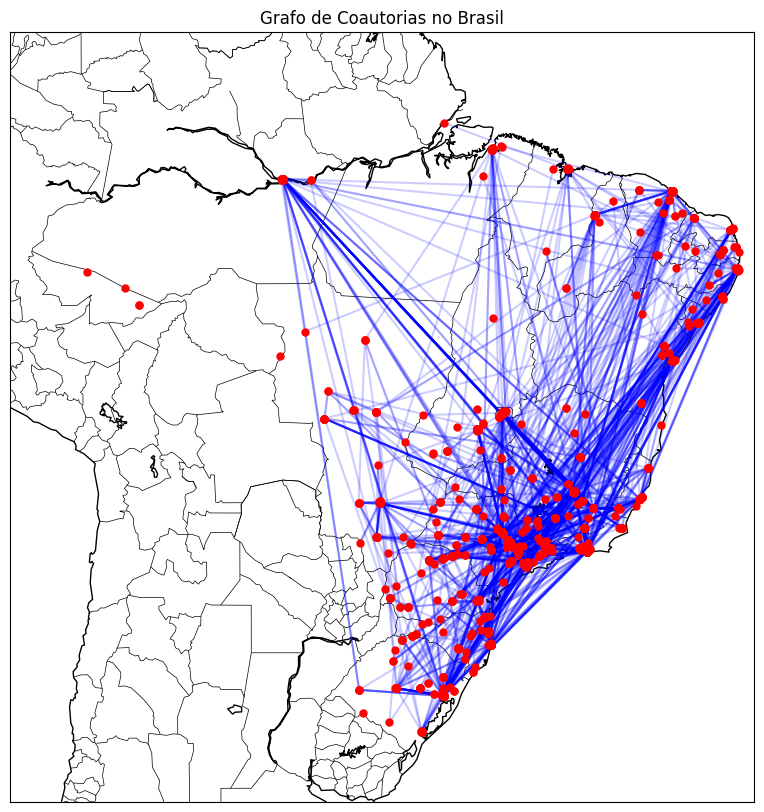

In [16]:
# Criar um dicionário de posições baseadas na latitude e longitude
positions = {}
for _, row in df_end.iterrows():
    positions[row['LattesID']] = (row['longitude'], row['latitude'])

# Configurar o mapa do Brasil usando Basemap
plt.figure(figsize=(12, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=-35, urcrnrlat=5,  # Latitudes do Brasil
    llcrnrlon=-75, urcrnrlon=-34,  # Longitudes do Brasil
    resolution='l'
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Converter as posições geográficas dos nós para coordenadas no mapa
mapped_positions = {}
for node, (lon, lat) in positions.items():
    x, y = m(lon, lat)
    mapped_positions[node] = (x, y)

# Plotar as arestas no mapa
for edge in G.edges():
    if edge[0] in mapped_positions and edge[1] in mapped_positions:
        x1, y1 = mapped_positions[edge[0]]
        x2, y2 = mapped_positions[edge[1]]
        plt.plot([x1, x2], [y1, y2], color="blue", alpha=0.2)

# Plotar os nós (autores)
for node, (x, y) in mapped_positions.items():
    plt.plot(x, y, 'ro', markersize=5)

# Adicionar título
plt.title("Grafo de Coautorias no Brasil")
plt.show()

# Metricas de grafos

Segue a definição, interpretação e a referência ao slide onde cada métrica aparece:

---

### **Métricas Locais**
1. **Centralidade de Grau (Degree Centrality)**  
   - **Definição**: Mede o número de conexões diretas de um nó. Em grafos direcionados, pode ser subdividida em grau de entrada e saída.  
   - **Interpretação**: Indica a quantidade de relações diretas de um indivíduo. Quanto maior, mais "popular" ou "influente" o nó.  
   - **Slide**: Slide 10 do arquivo "03_AnaliseEstrutural.pdf".

2. **Centralidade de Proximidade (Closeness Centrality)**  
   - **Definição**: Mede a distância média de um nó a todos os outros nós alcançáveis.  
   - **Interpretação**: Nó com alta centralidade de proximidade pode espalhar informações de forma eficiente pela rede.  
   - **Slide**: Slide 16 do arquivo "03_AnaliseEstrutural.pdf".

3. **Centralidade de Intermediação (Betweenness Centrality)**  
   - **Definição**: Mede quantos caminhos mínimos passam por um nó específico.  
   - **Interpretação**: Identifica nós que atuam como "pontes" ou facilitadores do fluxo de informações na rede.  
   - **Slide**: Slide 20 do arquivo "03_AnaliseEstrutural.pdf".

4. **Centralidade PageRank**  
   - **Definição**: Avalia a importância de um nó com base na importância dos nós que apontam para ele, iterativamente.  
   - **Interpretação**: Nó com alta centralidade PageRank é mais relevante em termos de conectividade influente, como no ranking de páginas na internet.  
   - **Slide**: Slide 24 do arquivo "03_AnaliseEstrutural.pdf".

5. **Coeficiente Local de Agrupamento (Local Clustering Coefficient)**  
   - **Definição**: Mede a probabilidade de os vizinhos de um nó também serem conectados entre si.  
   - **Interpretação**: Indica o quão "coesa" é a vizinhança de um nó. Altos valores sugerem agrupamentos densos.  
   - **Slide**: Slide 28 do arquivo "03_AnaliseEstrutural.pdf".

---

### **Métricas Globais**
1. **Número de Nós**  
   - **Definição**: Contagem de vértices no grafo.  
   - **Interpretação**: Representa o tamanho da rede em termos de participantes/indivíduos.  
   - **Slide**: Slide 8 do arquivo "04_AnaliseEstrutural_globais.pdf".

2. **Número de Arestas**  
   - **Definição**: Contagem de conexões no grafo.  
   - **Interpretação**: Indica o número total de relações presentes.  
   - **Slide**: Slide 9 do arquivo "04_AnaliseEstrutural_globais.pdf".

3. **Grau Médio**  
   - **Definição**: Média dos graus dos vértices no grafo.  
   - **Interpretação**: Quantifica a conectividade média na rede.  
   - **Slide**: Slide 12 do arquivo "04_AnaliseEstrutural_globais.pdf".

4. **Densidade**  
   - **Definição**: Razão entre o número de arestas existentes e o número máximo possível de arestas no grafo.  
   - **Interpretação**: Mede o quão preenchido está o grafo. Redes mais densas possuem maior conectividade.  
   - **Slide**: Slide 15 do arquivo "04_AnaliseEstrutural_globais.pdf".

5. **Número de Componentes Conexos**  
   - **Definição**: Quantidade de subgrafos onde qualquer par de vértices está conectado por um caminho.  
   - **Interpretação**: Mede a fragmentação da rede.  
   - **Slide**: Slide 18 do arquivo "04_AnaliseEstrutural_globais.pdf".

6. **Tamanho do Componente Gigante**  
   - **Definição**: Número de nós no maior componente conexo.  
   - **Interpretação**: Representa a maior parte da rede conectada. Um alto valor indica alta coesão.  
   - **Slide**: Slide 22 do arquivo "04_AnaliseEstrutural_globais.pdf".

7. **Tamanho do Clique Máximo**  
   - **Definição**: Número de nós no maior conjunto onde todos estão conectados diretamente entre si.  
   - **Interpretação**: Mede o maior subgrupo totalmente coeso.  
   - **Slide**: Slide 26 do arquivo "04_AnaliseEstrutural_globais.pdf".

8. **Média dos Caminhos Mínimos**  
   - **Definição**: Soma dos menores caminhos entre todos os pares de nós, dividida pelo número de pares.  
   - **Interpretação**: Indica a proximidade média entre os nós.  
   - **Slide**: Slide 30 do arquivo "04_AnaliseEstrutural_globais.pdf".

9. **Diâmetro**  
   - **Definição**: Comprimento do maior caminho mínimo entre quaisquer dois nós do grafo.  
   - **Interpretação**: Mede a extensão máxima da rede.  
   - **Slide**: Slide 34 do arquivo "04_AnaliseEstrutural_globais.pdf".

10. **Assortatividade**  
    - **Definição**: Correlação entre graus dos nós conectados.  
    - **Interpretação**: Mede a tendência de nós com características semelhantes se conectarem.  
    - **Slide**: Slide 38 do arquivo "04_AnaliseEstrutural_globais.pdf".

11. **Coeficiente Global de Agrupamento (Global Clustering Coefficient)**  
    - **Definição**: Razão entre o número de ciclos de tamanho 3 (triângulos) e o número de triplas conectadas na rede.  
    - **Interpretação**: Mede a coesão global da rede.  
    - **Slide**: Slide 42 do arquivo "04_AnaliseEstrutural_globais.pdf".

12. **Centralização (Freeman Centralization)**  
    - **Definição**: Mede a diferença entre a centralidade do nó mais central e dos demais.  
    - **Interpretação**: Indica o grau de dependência da rede em relação ao nó mais central.  
    - **Slide**: Slide 46 do arquivo "04_AnaliseEstrutural_globais.pdf".

13. **Modularidade**  
    - **Definição**: Avalia a força ou qualidade da divisão do grafo em comunidades.  
    - **Interpretação**: Quanto maior, melhor definida está a estrutura modular da rede.  
    - **Slide**: Slide 50 do arquivo "04_AnaliseEstrutural_globais.pdf".

---

Essas métricas abrangem características estruturais importantes, permitindo análises detalhadas sobre propriedades locais e globais da rede. Se precisar de ajuda para calcular alguma delas, posso ajudar!

## Metricas locais

In [ ]:
###################################Métricas locais para o nó LattesID_1689147340536405:
Degree Centrality: 0.004059962523422861
Closeness Centrality: 0.18920079828668013
Betweenness Centrality: 0.0021029020406970926
PageRank: 0.0003510190051606145
Local Clustering Coefficient: 0.05128205128205128
# Métricas locais
metrics_local = {
    "Degree Centrality": nx.degree_centrality(G),
    "Closeness Centrality": nx.closeness_centrality(G),
    "Betweenness Centrality": nx.betweenness_centrality(G),
    "PageRank": nx.pagerank(G),
    "Local Clustering": nx.clustering(G),
}

# Exibindo os resultados
# print("Métricas Locais:")
# for metric, values in metrics_local.items():
#     print(f"{metric}: {values}")



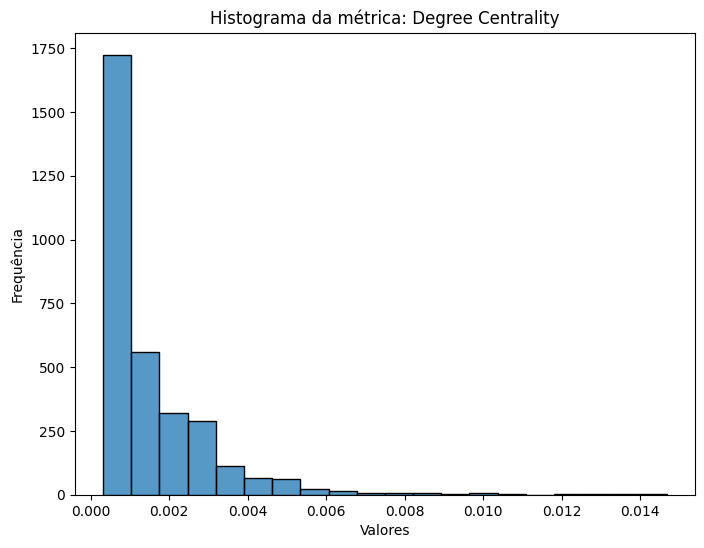

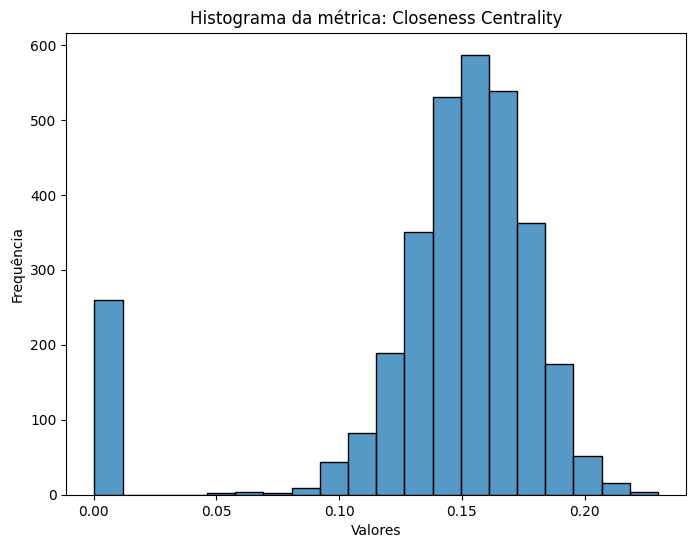

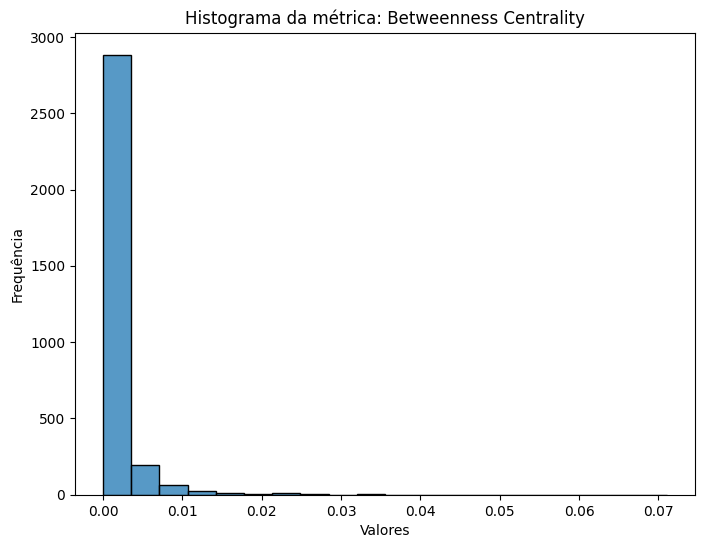

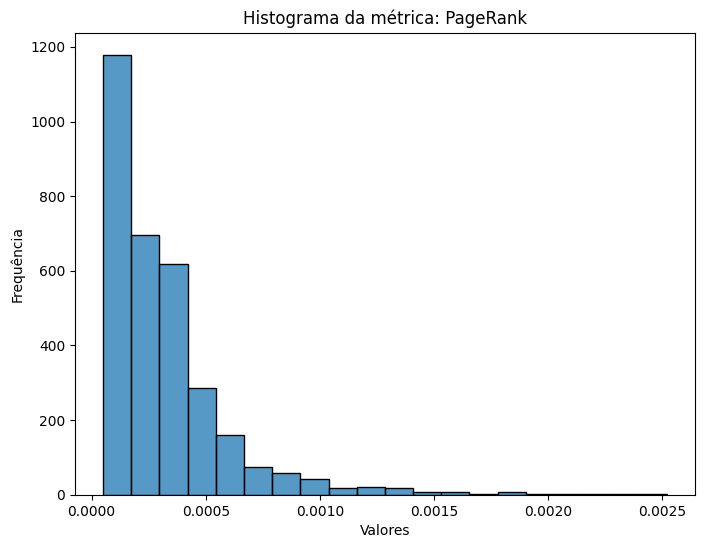

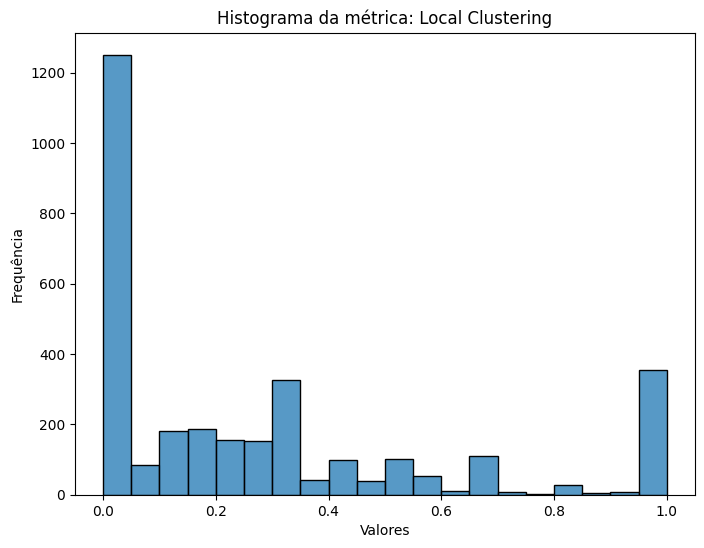

In [18]:
for metric, lista in metrics_local.items():
    
    # Gerar o histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(lista, kde=False, bins=20)
    plt.title(f"Histograma da métrica: {metric}")
    plt.xlabel("Valores")
    plt.ylabel("Frequência")
    plt.show()

In [19]:
############################
# Achar nós com as maiores métricas
############################


# Função para encontrar o nó com o maior valor em uma métrica
def find_max_metric(metric_dict):
    return max(metric_dict.items(), key=lambda x: x[1])

# Métricas locais e nó com maior valor
metrics_local = {
    "Degree Centrality": nx.degree_centrality(G),
    "Closeness Centrality": nx.closeness_centrality(G),
    "Betweenness Centrality": nx.betweenness_centrality(G),
    "PageRank": nx.pagerank(G),
    "Local Clustering": nx.clustering(G),
}

# Encontrando os nós com maior valor para cada métrica
max_nodes_local = {metric: find_max_metric(values) for metric, values in metrics_local.items()}

# Exibindo os resultados
print("Nó com maior valor para cada métrica local:")
for metric, (node, value) in max_nodes_local.items():
    print(f"{metric}: Node {node} com valor {value}")

Nó com maior valor para cada métrica local:
Degree Centrality: Node LattesID_2608560883389574 com valor 0.01467832604622111
Closeness Centrality: Node LattesID_9674541381385819 com valor 0.2298564460137584
Betweenness Centrality: Node LattesID_9674541381385819 com valor 0.07104006766380472
PageRank: Node LattesID_1404632471755241 com valor 0.002519092924622661
Local Clustering: Node LattesID_1010721095594895 com valor 1.0


In [20]:
############################
# Achar nós com as maiores métricas
############################

def get_node_metrics(G, node_name):
    """
    Retorna as métricas locais de um nó específico em um grafo.

    Parâmetros:
        G (networkx.Graph): O grafo.
        node_name: O nome do nó para o qual calcular as métricas.

    Retorna:
        dict: Um dicionário contendo as métricas locais do nó.
    """
    # Verifica se o nó existe no grafo
    if node_name not in G:
        raise ValueError(f"Nó '{node_name}' não encontrado no grafo.")
    
    # Calcula as métricas locais para o nó
    metrics = {
        "Degree Centrality": nx.degree_centrality(G).get(node_name, 0),
        "Closeness Centrality": nx.closeness_centrality(G).get(node_name, 0),
        "Betweenness Centrality": nx.betweenness_centrality(G).get(node_name, 0),
        "PageRank": nx.pagerank(G).get(node_name, 0),
        "Local Clustering Coefficient": nx.clustering(G).get(node_name, 0),
    }
    return metrics


# Nome do nó desejado
node_name = 'LattesID_1689147340536405'  # Substitua pelo nome do nó que você quer analisar

try:
    metrics = get_node_metrics(G, node_name)
    print(f"Métricas locais para o nó {node_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
except ValueError as e:
    print(e)

Métricas locais para o nó LattesID_1689147340536405:
Degree Centrality: 0.004059962523422861
Closeness Centrality: 0.18920079828668013
Betweenness Centrality: 0.0021029020406970926
PageRank: 0.0003510190051606145
Local Clustering Coefficient: 0.05128205128205128


## Metricas globais

In [21]:
import networkx as nx
from statistics import median

# Métricas globais
metrics_global = {
    "Number of Nodes": G.number_of_nodes(),
    "Number of Edges": G.number_of_edges(),
    "Average Degree": sum(dict(G.degree()).values()) / G.number_of_nodes(),
    "Median Degree": median(dict(G.degree()).values()),
    "Density": nx.density(G),
    "Number of Connected Components": nx.number_connected_components(G),
    "Largest Connected Component Size": len(max(nx.connected_components(G), key=len)),
    "Max Clique Size": len(max(nx.find_cliques(G), key=len)),
    "Average Shortest Path Length": nx.average_shortest_path_length(G) if nx.is_connected(G) else None,
    "Diameter": nx.diameter(G) if nx.is_connected(G) else None,
    "Assortativity": nx.degree_assortativity_coefficient(G),
    "Global Clustering": nx.transitivity(G),
}


print("\nMétricas Globais:")
for metric, value in metrics_global.items():
    print(f"{metric}: {value}")



Métricas Globais:
Number of Nodes: 3203
Number of Edges: 7570
Average Degree: 4.726818607555416
Median Degree: 3
Density: 0.0014762081847456018
Number of Connected Components: 102
Largest Connected Component Size: 2943
Max Clique Size: 8
Average Shortest Path Length: None
Diameter: None
Assortativity: 0.16580141649249555
Global Clustering: 0.2278810408921933


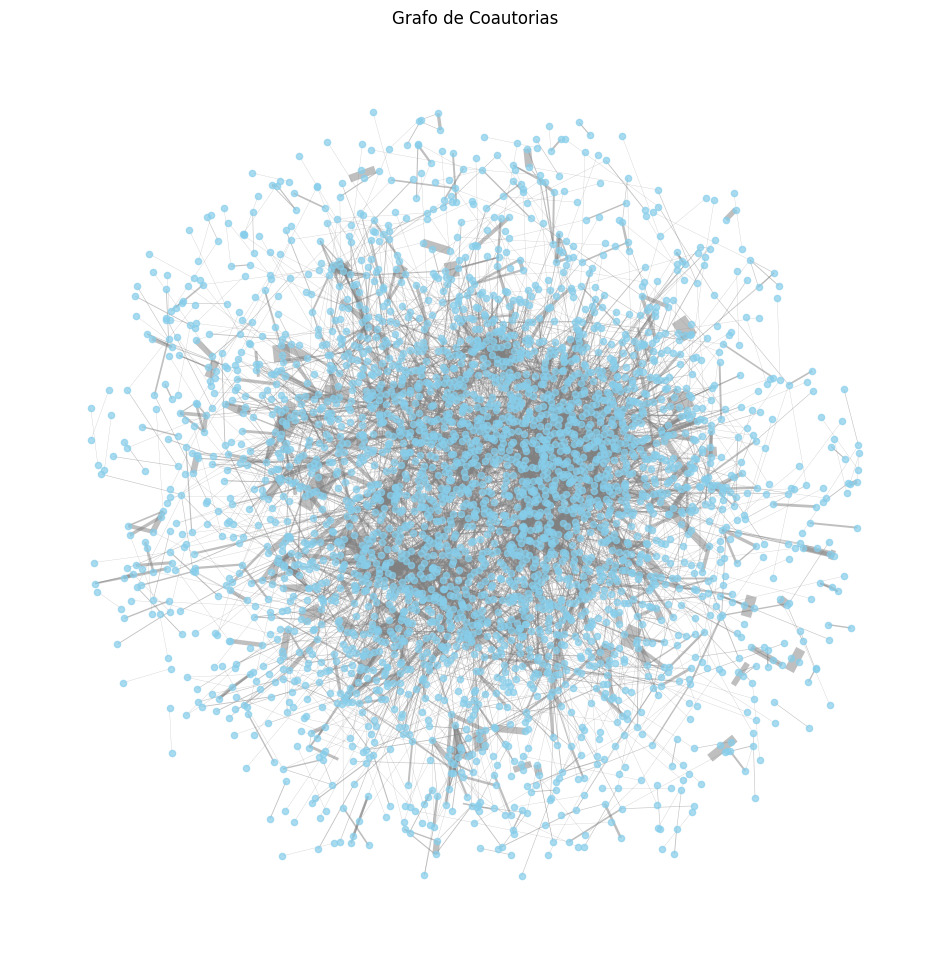

In [22]:

min_weight_edge = -1


# Configurar o layout do grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1, seed=42)  # 'k' controla a distância entre os nós

# Configurar as arestas com pesos (exibir apenas arestas com peso > 1 para melhor visualização)
edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > min_weight_edge]
weights = [G[u][v]['weight'] for u, v in edges]

# Desenhar nós
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue', alpha=0.7)

# Desenhar arestas ponderadas
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w * 0.2 for w in weights], edge_color='gray', alpha=0.5)

# Adicionar rótulos aos nós (apenas alguns, para evitar poluição visual)
sampled_nodes = dict(list(pos.items())[:50])  # Limita a visualização de rótulos a 50 nós
# nx.draw_networkx_labels(G, sampled_nodes, font_size=6, font_color='black', font_family='sans-serif')

# Ocultar eixos e mostrar o grafo
plt.axis('off')
plt.title("Grafo de Coautorias")
plt.show()